In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [3]:
company_data = pd.read_csv('Company_Data.csv')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
company_data['Sales'].value_counts()

7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: Sales, Length: 336, dtype: int64

In [5]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
company_data['Sales'] = label_encoder.fit_transform(company_data['Sales'])

In [9]:
company_data['Sales'].value_counts()

183    4
223    3
243    3
34     3
117    3
      ..
28     1
172    1
257    1
205    1
262    1
Name: Sales, Length: 336, dtype: int64

In [11]:
company_data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [12]:
company_data.isna().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

let's plot pair plot to visualise the attributes all at once

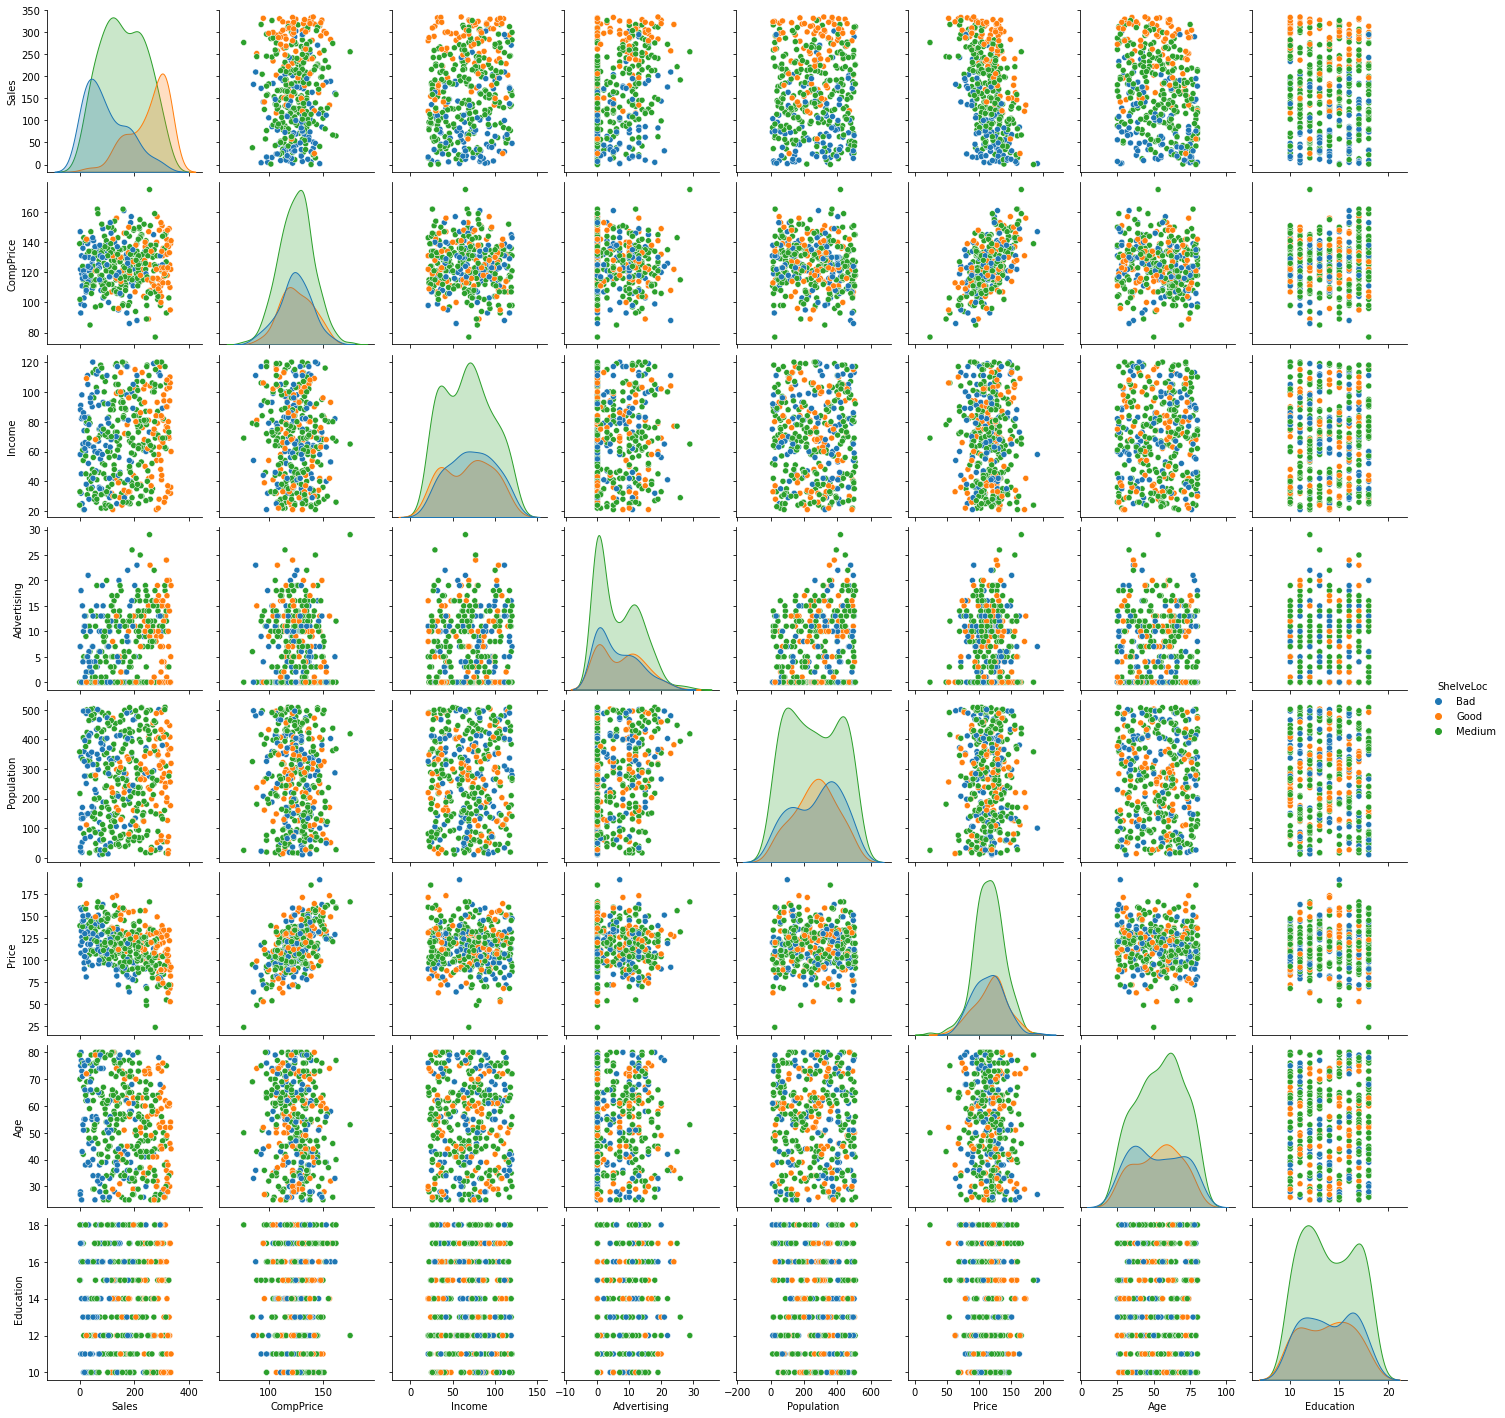

In [13]:
sns.pairplot(data=company_data, hue = 'ShelveLoc')
plt.show()

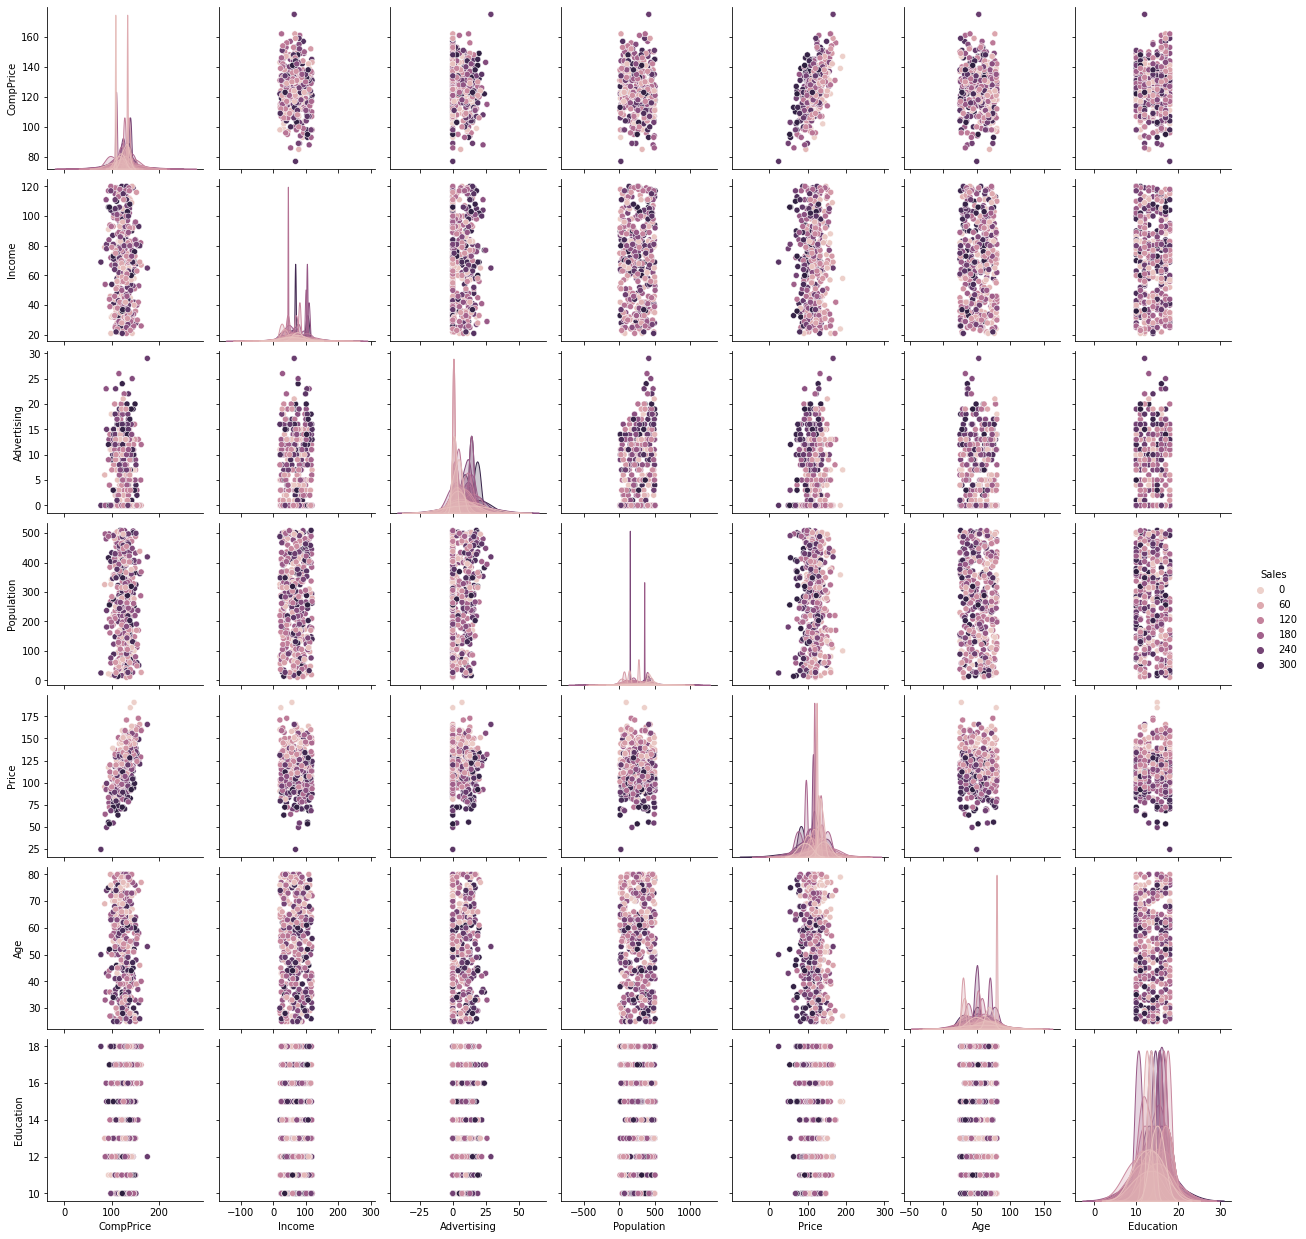

In [14]:
sns.pairplot(data=company_data, hue = 'Sales')
plt.show()

Creating dummy vairables dropping first dummy variable

In [16]:
df=pd.get_dummies(company_data,columns=['Urban','US'], drop_first=True)

In [17]:
print(df.head())

   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0    255        138      73           11         276    120       Bad   42   
1    297        111      48           16         260     83      Good   65   
2    267        113      35           10         269     80    Medium   59   
3    158        117     100            4         466     97    Medium   55   
4     37        141      64            3         340    128       Bad   38   

   Education  Urban_Yes  US_Yes  
0         17          1       1  
1         10          1       1  
2         12          1       1  
3         14          1       1  
4         13          1       0  


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sales        400 non-null    int64 
 1   CompPrice    400 non-null    int64 
 2   Income       400 non-null    int64 
 3   Advertising  400 non-null    int64 
 4   Population   400 non-null    int64 
 5   Price        400 non-null    int64 
 6   ShelveLoc    400 non-null    object
 7   Age          400 non-null    int64 
 8   Education    400 non-null    int64 
 9   Urban_Yes    400 non-null    uint8 
 10  US_Yes       400 non-null    uint8 
dtypes: int64(8), object(1), uint8(2)
memory usage: 29.0+ KB


In [19]:
df['ShelveLoc']=df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [20]:
print(df.head())

   Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0    255        138      73           11         276    120          3   42   
1    297        111      48           16         260     83          1   65   
2    267        113      35           10         269     80          2   59   
3    158        117     100            4         466     97          2   55   
4     37        141      64            3         340    128          3   38   

   Education  Urban_Yes  US_Yes  
0         17          1       1  
1         10          1       1  
2         12          1       1  
3         14          1       1  
4         13          1       0  


In [21]:
x=df.iloc[:,0:6]
y=df['ShelveLoc']

In [22]:
x

,Sales,CompPrice,Income,Advertising,Population,Price
0,255,138,73,11,276,120
1,297,111,48,16,260,83
2,267,113,35,10,269,80
3,158,117,100,4,466,97
4,37,141,64,3,340,128
...,...,...,...,...,...,...
395,320,138,108,17,203,128
396,114,139,23,3,37,120
397,159,162,26,12,368,159
398,106,100,79,7,284,95


In [23]:
y

0      3
1      1
2      2
3      2
4      3
      ..
395    1
396    2
397    2
398    3
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [24]:
df['ShelveLoc'].unique()

array([3, 1, 2])

In [25]:
df.ShelveLoc.value_counts()

2    219
3     96
1     85
Name: ShelveLoc, dtype: int64

In [26]:
colnames = list(df.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']

Splitting data into training and testing data set

In [27]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

Building Decision Tree Classifier using Entropy Criteria

In [28]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [29]:
from sklearn import tree

PLot the decision tree

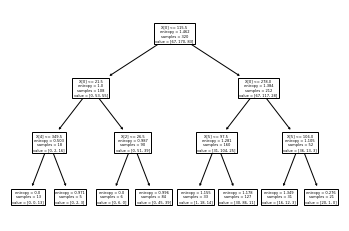

In [30]:
tree.plot_tree(model);

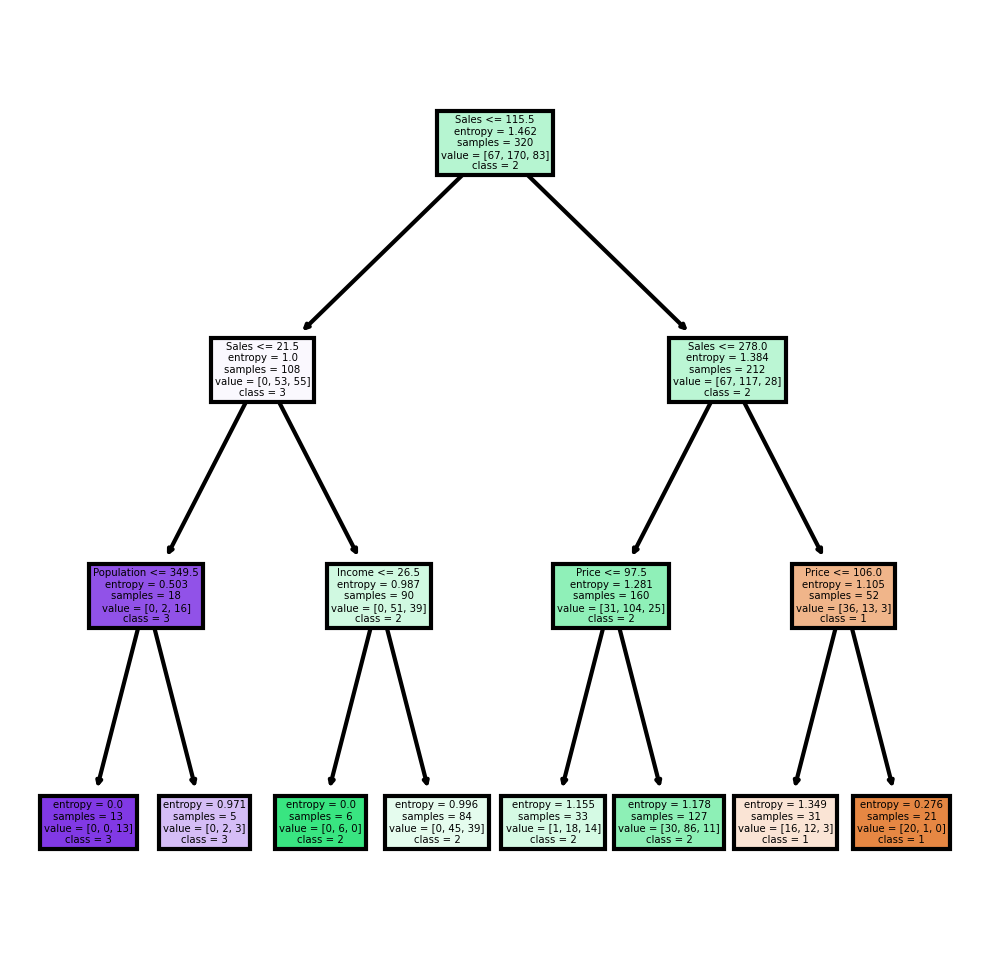

In [31]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

Predicting on test data

In [32]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

2    65
1    11
3     4
dtype: int64

In [33]:
preds

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2])

getting the 2 way table to understand the correct and wrong predictions

In [34]:
pd.crosstab(y_test,preds) 


col_0,1,2,3
ShelveLoc,,,
1,8,10,0
2,3,43,3
3,0,12,1


Accuracy 

In [35]:
np.mean(preds==y_test)

0.65

Hence the Model accuracy is 65%

Building Decision Tree Classifier (CART) using Gini Criteria

In [36]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [38]:
model_gini.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=3)

#Prediction and computing the accuracy

In [39]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.65

Hence the model accuracy is 65%